In [35]:
!pip install ipython-sql
%load_ext sql
%sql sqlite://

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [30]:
!pip install jupysql duckdb-engine --quiet

In [31]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [32]:
%sql duckdb://

# 1. Select
The SELECT statement is used to retrieve data from one or more tables in a database. You should master using SELECT to filter, sort, and group data using different functions such as WHERE, ORDER BY, and GROUP BY. Here is an example of a SELECT statement:

`SELECT column1, column2, column3
FROM table_name
WHERE condition;`

# 2. SELECT DISTINCT
The DISTINCT clause is used in the SELECT statement to remove duplicate rows from a
result set. The DISTINCT clause keeps one row for each group of duplicates. You can
use the DISTINCT clause on one or more columns of a table.

`SELECT DISTINCT column_1,column_2
FROM tbl_name;`

1. Find out the number of cities:

`SELECT COUNT(*)
FROM city;`

2. Find out the number of cities with non-null ratings:

`SELECT COUNT(rating)
FROM city;`

3. Find out the number of distinctive country values:

`SELECT COUNT(DISTINCT country_id)
FROM city;`

4. Find out the smallest and the greatest country populations:

`SELECT MIN(population), MAX(population)
FROM country;`

5. Orders per customer

`SELECT
   COUNT(order_id) / COUNT(DISTINCT customer_id) as orders_per_cust
FROM
   customer_orders`

# 3. JOIN
The JOIN statement is used to combine data from two or more tables in a database. You should master using JOIN to retrieve data from multiple tables and specify the type of join (e.g. INNER, LEFT, RIGHT, FULL OUTER) as appropriate.

Here are a few examples of JOIN statements:

`SELECT orders.order_id, customers.customer_name
FROM orders
INNER JOIN customers
ON orders.customer_id = customers.customer_id;`

`SELECT customers.customer_name, orders.order_id
FROM customers
LEFT JOIN orders
ON customers.customer_id = orders.customer_id;`


`SELECT customers.customer_name, orders.order_id
FROM customers
RIGHT JOIN orders
ON customers.customer_id = orders.customer_id;`

`SELECT customers.customer_name, orders.order_id
FROM customers
LEFT OUTER JOIN orders
ON customers.customer_id = orders.customer_id;`

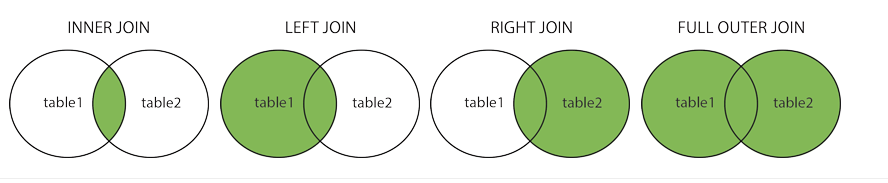

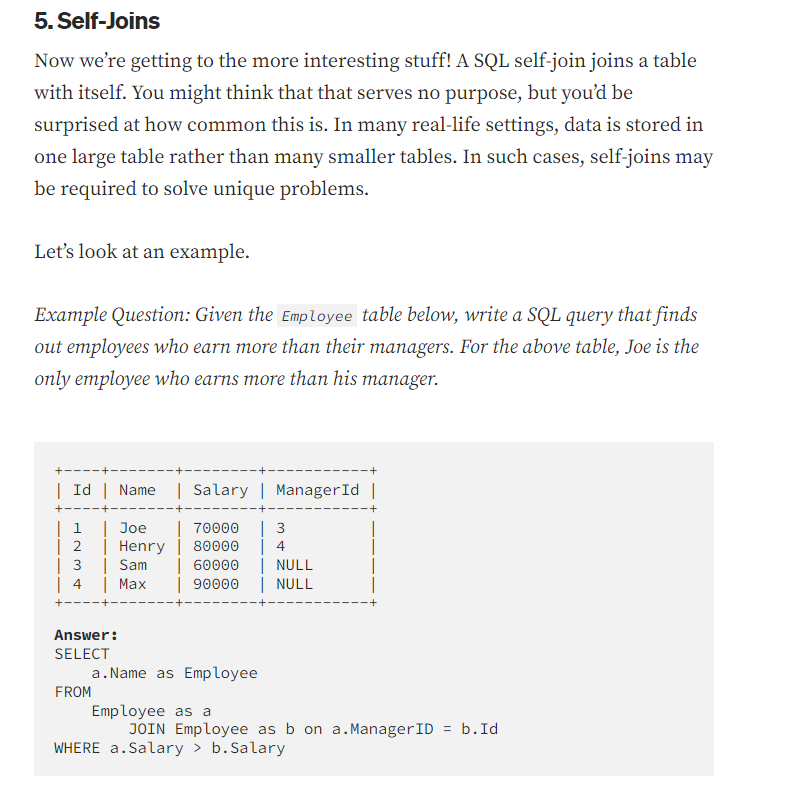

# 4. WHERE
The WHERE statement is used to filter data based on a specified condition. You should master using WHERE to retrieve only the data that meets certain criteria.

1. `SELECT name, department, salary
FROM employees
WHERE department = 'Sales' AND salary > 50000;`

2. `SELECT customer_id, rental_id, return_date
FROM rental
WHERE customer_id IN (1, 2)
ORDER BY return_date DESC;`

3. `SELECT customer_id, payment_id,amount
FROM payment
WHERE amount BETWEEN 8 AND 9;` #same as 4

4. ` SELECT customer_id, payment_id,amount
FROM payment
WHERE value >= 8 and value <= 9;`


- Percent ( %) for matching any sequence of characters.
- Underscore ( _) for matching any single character.


5. `SELECT first_name,last_name
FROM customer
WHERE first_name LIKE 'Zinia%' `

6. `SELECT name
FROM city
WHERE name != 'Berlin'
  AND name != 'Madrid';`
7. `SELECT name
FROM city
WHERE name LIKE 'P%'
  OR name LIKE '%s';`

8.Fetch names of cities that don't miss a rating value:

`SELECT name
FROM city
WHERE rating IS NOT NULL;`

# 5. LIMIT
PostgreSQL LIMIT is used in the SELECT statement to get a subset of rows returned by
the query. The following is the common syntax of the LIMIT clause:
- PostgreSQL first skips m rows before returning n rows generated by the query. If m is
zero, PostgreSQL will behave like without the OFFSET clause.
- Because the order of the rows in the database table is unknown and unpredictable,
when you use the LIMIT clause, you should always use the ORDER BY clause to control
the order of rows. If you don’t do so, you will get an unpredictable result.



`SELECT *
FROM TABLE
LIMIT n OFFSET m;`

`SELECT column_1,column_2
FROM tbl_name
ORDER BY column_1 ASC, column_2 DESC;`

# 6. GROUP BY
The GROUP BY statement is used to group data based on one or more columns, and aggregate functions (e.g. COUNT, SUM, AVG) can be used to calculate summaries of the grouped data.

- The GROUP BY clause must appear right after the FROM or WHERE clause. 
- SELECT statements (non aggregate ones) should be part of GROUP BY clause 

`SELECT department, AVG(salary) as avg_salary
FROM employees
GROUP BY department;`

# 7. HAVING
The HAVING statement is used to filter data after it has been grouped by the GROUP BY statement. You should master using HAVING to filter grouped data based on specific conditions.

`SELECT customer_id, SUM(quantity) AS total_quantity
FROM orders
GROUP BY customer_id
HAVING SUM(quantity) >= 50;`

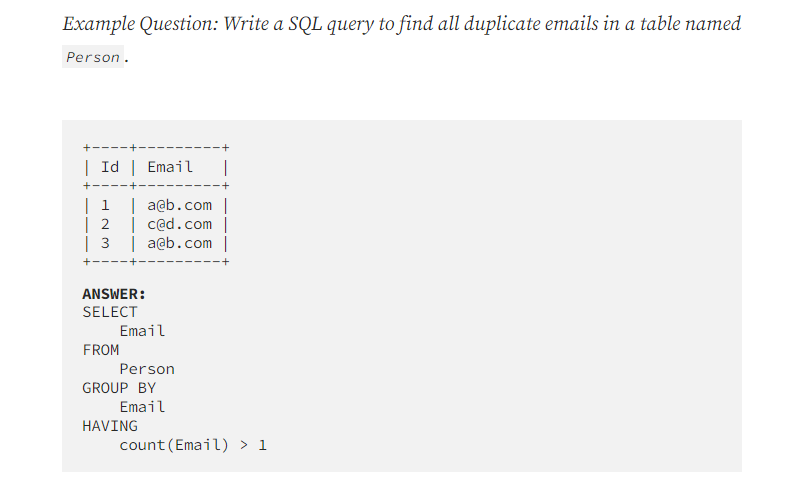

# 8. Window Function
Window functions are similar to the aggregation done in the GROUP BY clause. However, rows are not grouped into a single row, each row retains their separate identity. That is, a window function may return a single value for each row. 

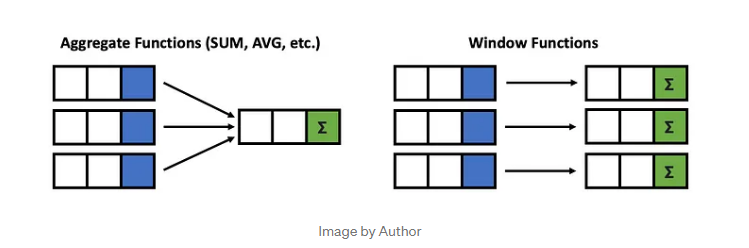
Order:
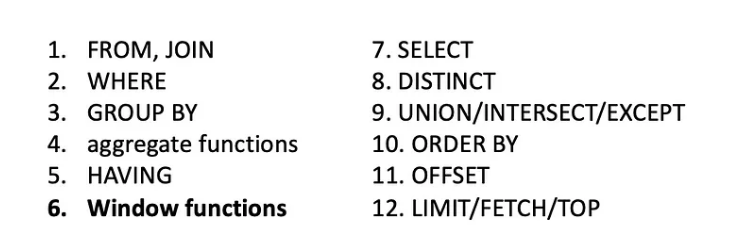

```SELECT column1, column2, ..., 
          <window function>(expression) OVER 
          (PARTITION BY <partition list> ORDER BY <column1> ORDER BY <order list>)
FROM table_name;```

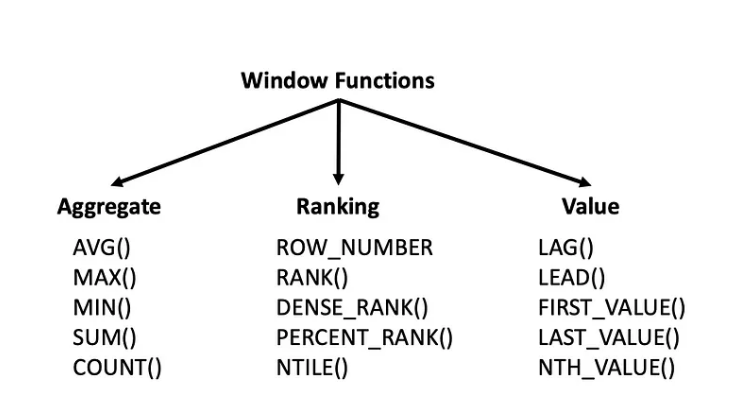

# Aggregate Functions

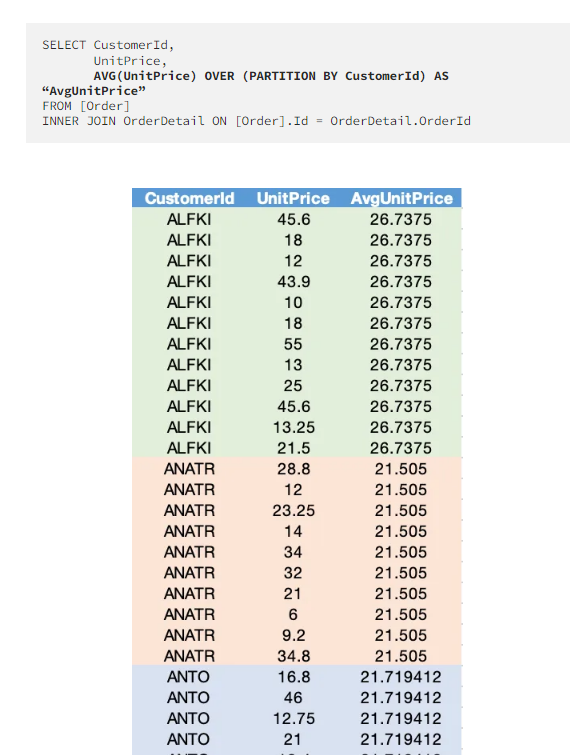

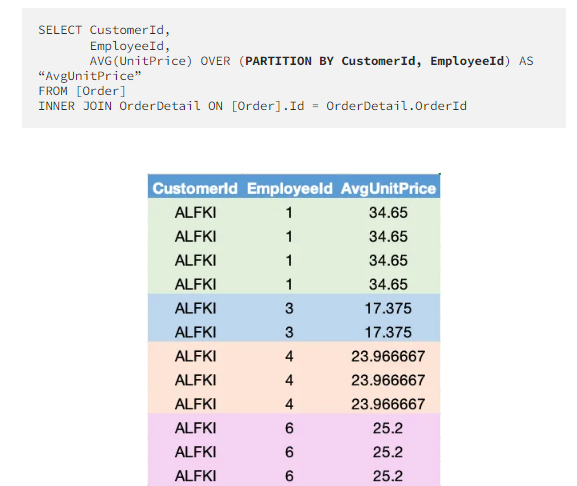

# Ranking Functions
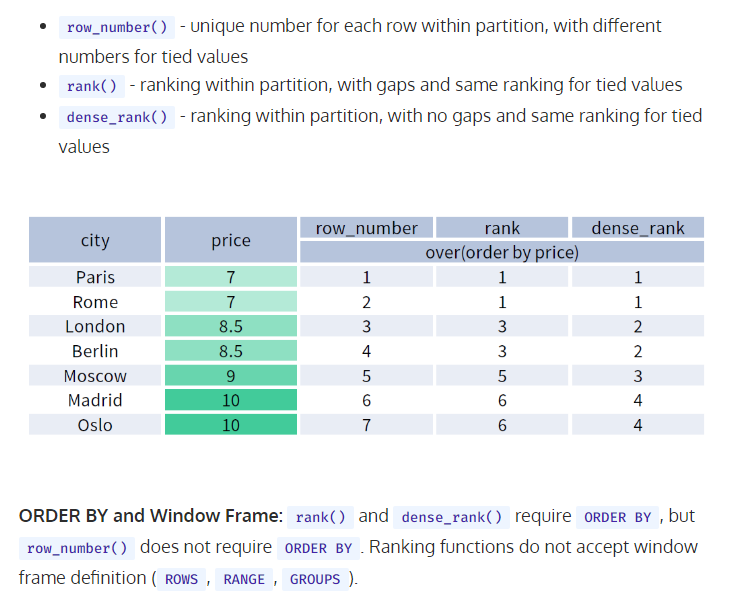

1. **ROW_NUMBER()**:
We can use this function to show the row number of a given row within its partition. Note that for the ranking functions, we do not have to specify an expression within the parentheses like we did previously for the aggregate functions.
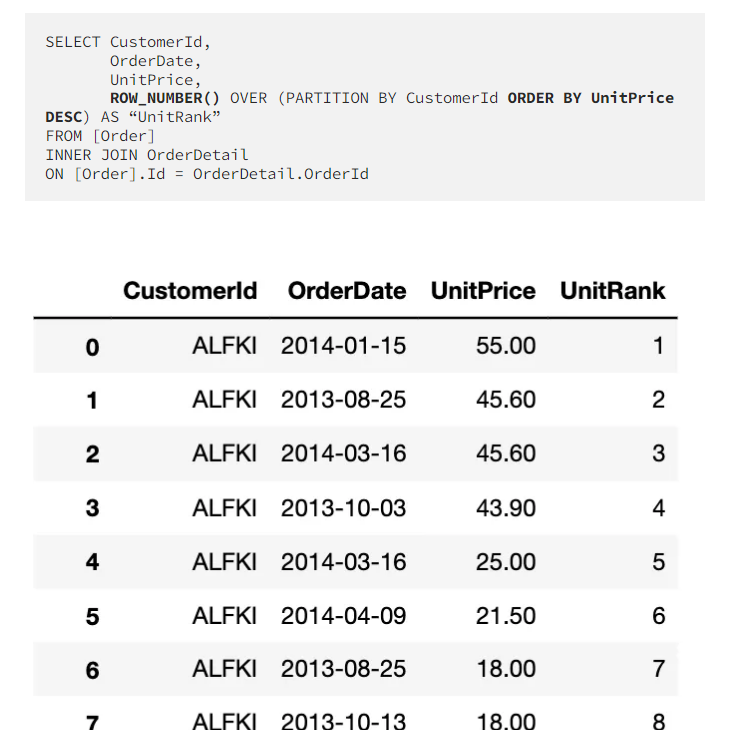

2. **RANK()**:if you have multiple values with the exact same value, the rank function will give them the same rank.
- ranking with partition, with gaps and same ranking for tied values
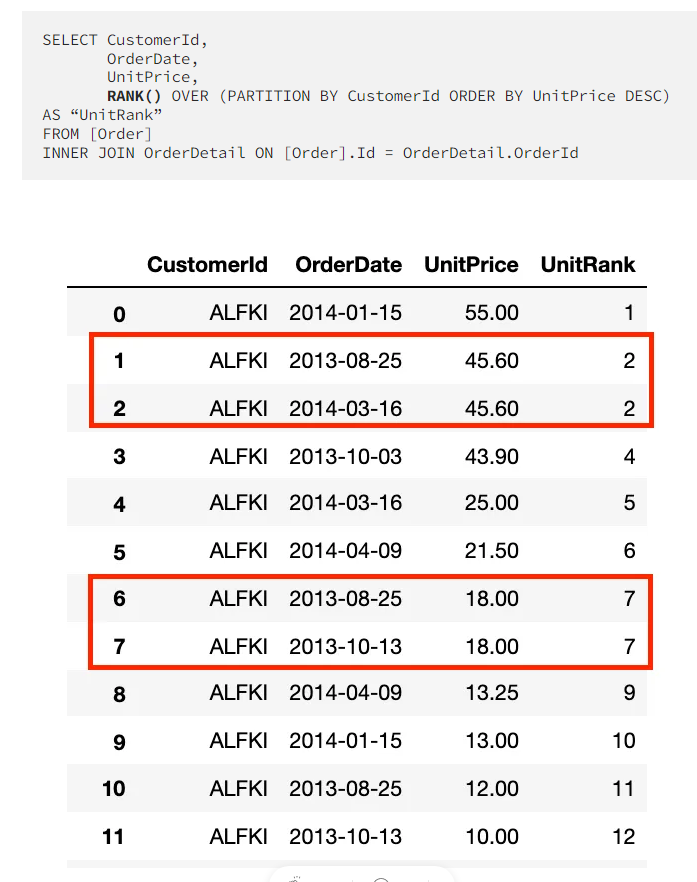

3. **DENSE RANK()**: ranking with partition, with **no** gaps and same ranking for tied values
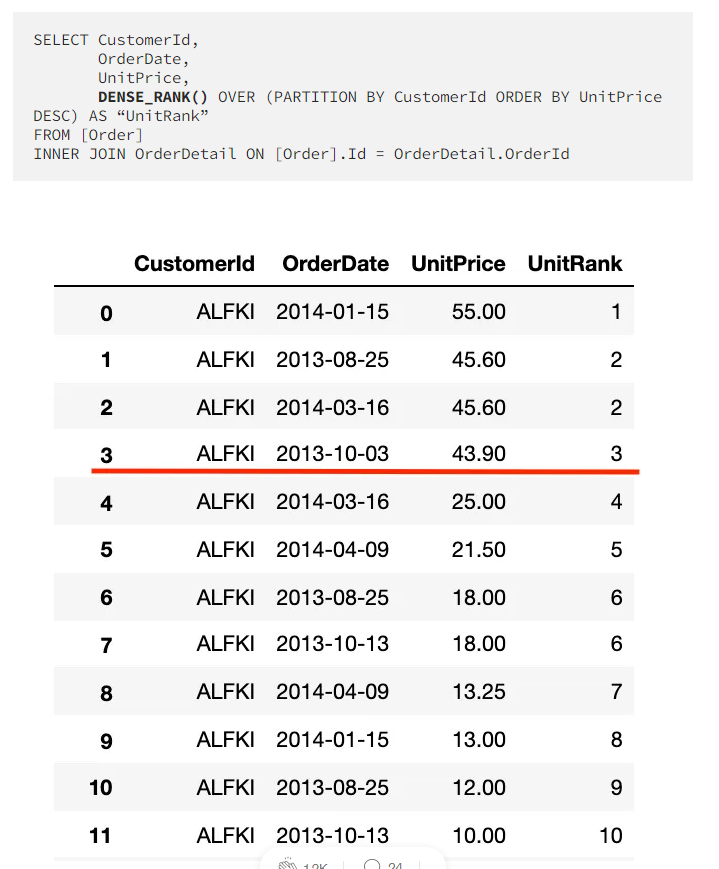

4. **Percent_rank**:  the percentile ranking number of a row—a value in [0, 1] interval: (rank-1) / (total number of rows - 1)
5. **cume_dist()** - the cumulative distribution of a value within a group of values, i.e., the number of rows with values less than or equal to the current row’s value divided by the total number of rows; a value in (0, 1] interval
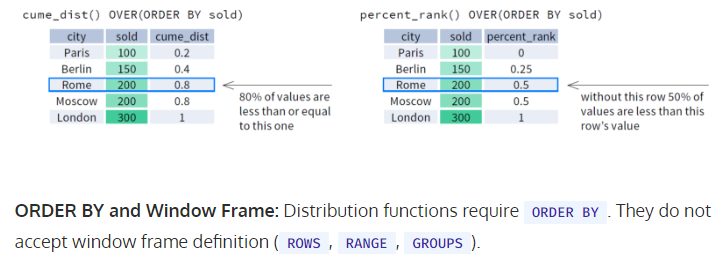

6. **n_tile(n)**:  divide rows within a partition as equally as possible into n groups, and assign each row its group number.
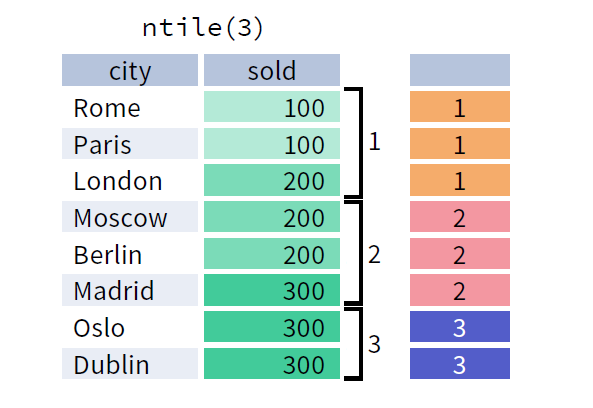

# Value Functions

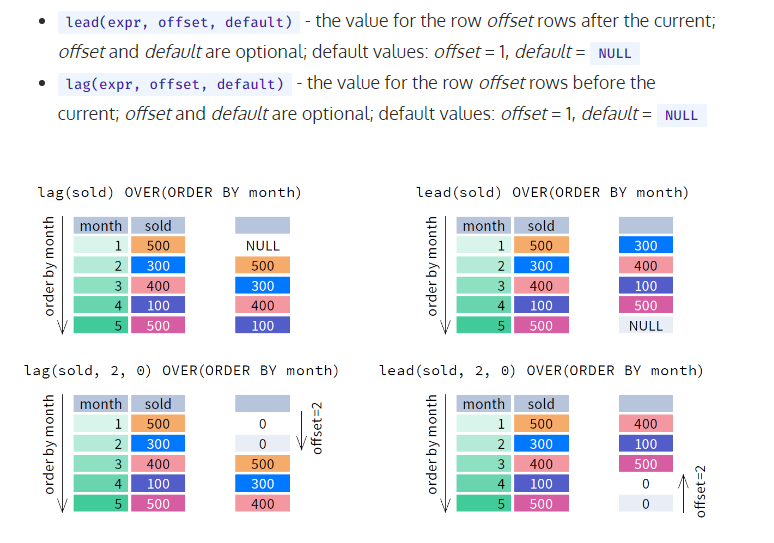

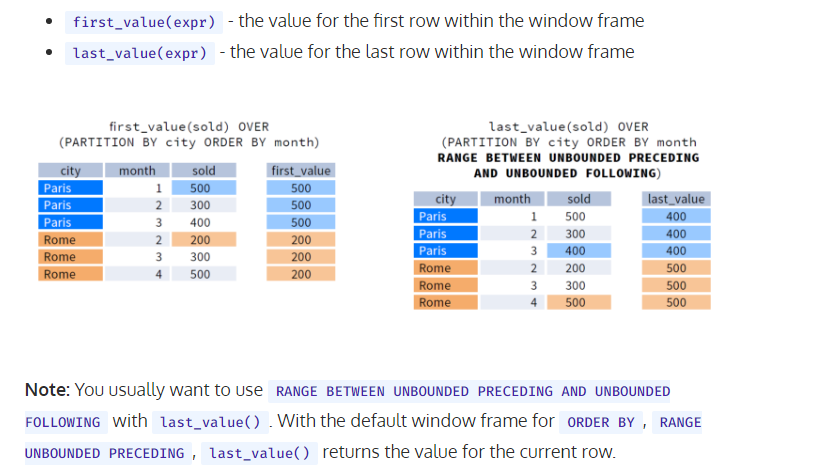

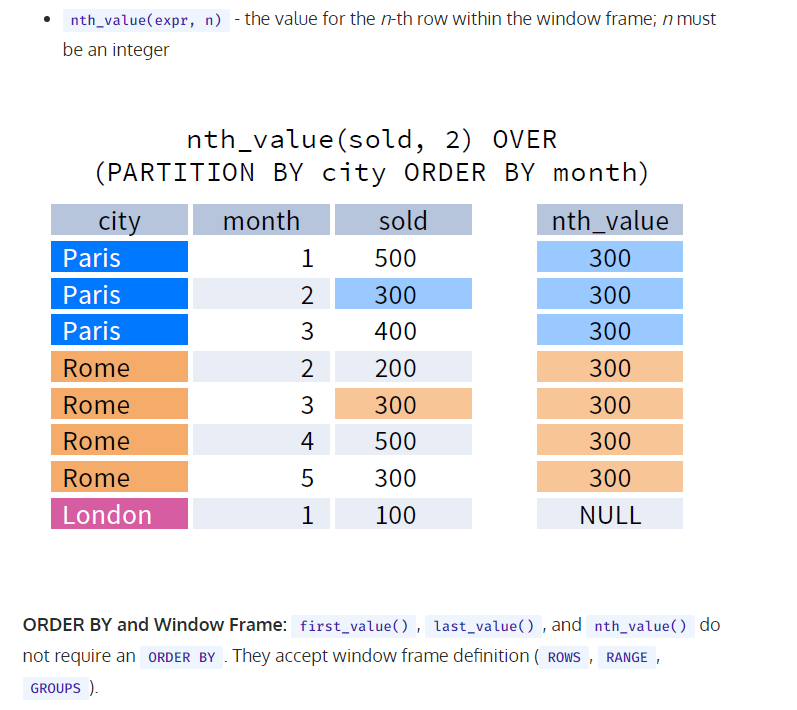

# Window Frame

A window frame is a set of rows that are somehow related to the current row. The window frame is evaluated separately within each partition.

**`ROWS BETWEEN <starting_row> AND <ending_row>`**

The bounds can be any of the five options:
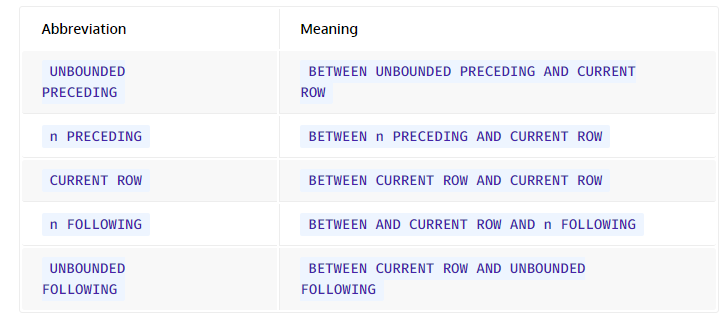
- The lower_bound must be BEFORE the upper_bound
- If ORDER BY is specified, then the frame is RANGE BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW.
- Without ORDER BY, the frame specification is ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING.

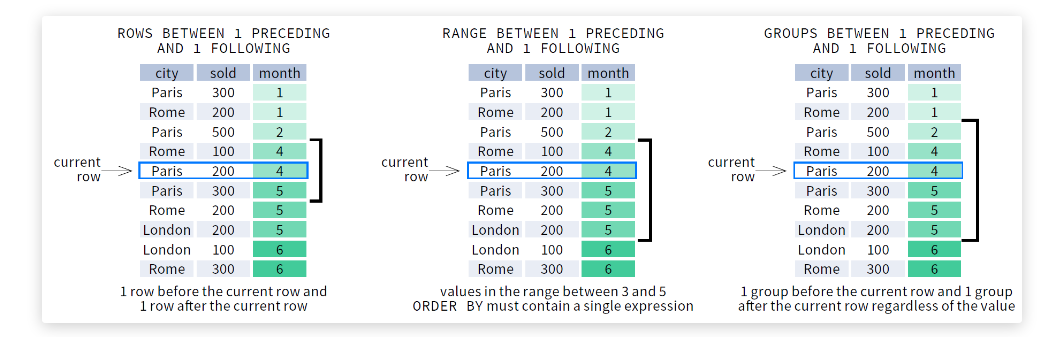

**Calculate a cumulative moving average UnitPrice for each CustomerId.**
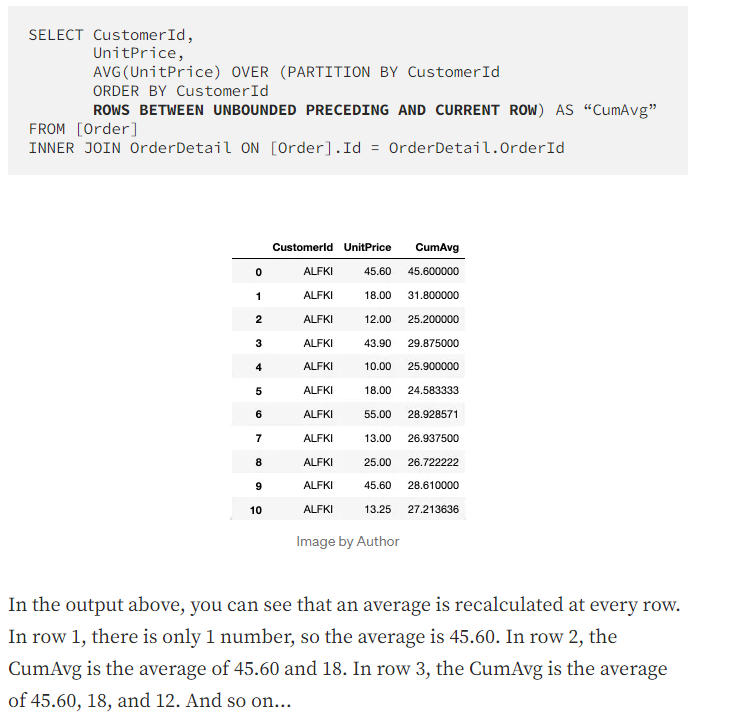

# 9. UNION

UNION combines the results of two result sets and removes duplicates. UNION ALL doesn't remove duplicate rows.

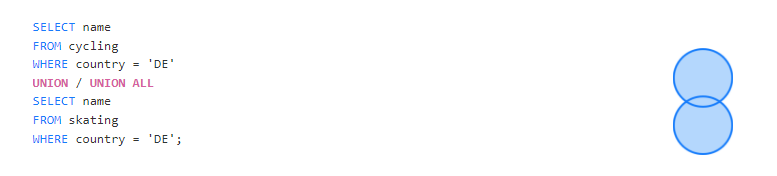

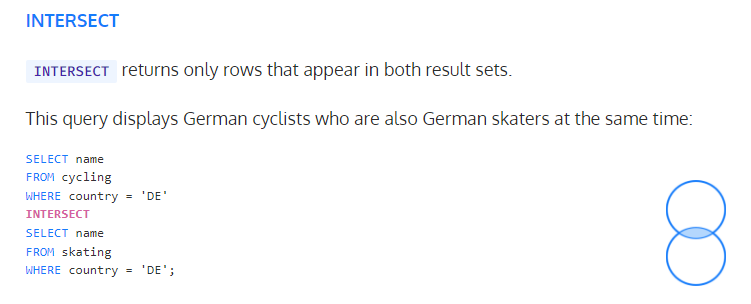

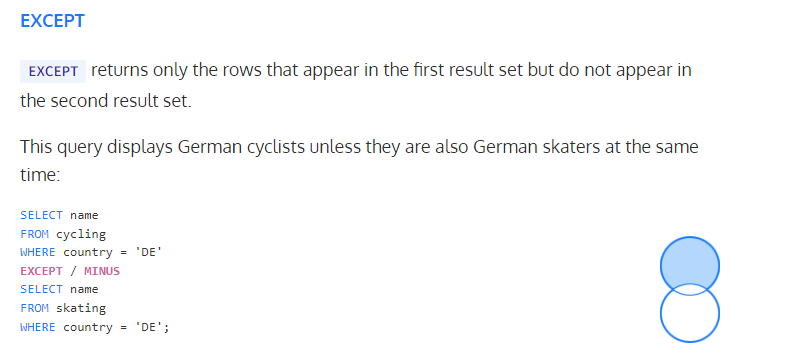

# 10. TEXT FUNCTIONS

1. **CONCATENATION**
Use the || operator to concatenate two strings:

In [5]:
%%sql

SELECT CONCAT('SQL', ' is', ' fun!');

*  duckdb://
Done.


[('SQL is fun!',)]

In [6]:
%%sql
SELECT '' || 4 || 2;

*  duckdb://
Done.


[('42',)]

In [7]:
%%sql
SELECT 'Hi ' || 'there!';

*  duckdb://
Done.


[('Hi there!',)]

In [11]:
%%sql
SELECT LENGTH('LearnSQL.com');

*  duckdb://
Done.


[(12,)]

In [13]:
%%sql
SELECT LOWER('LEARNSQL.COM');

*  duckdb://
Done.


[('learnsql.com',)]

In [36]:
%%sql
SELECT UPPER('LearnSQL.com');

   duckdb://
*  sqlite://
Done.


[('LEARNSQL.COM',)]

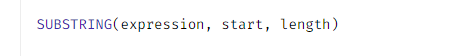
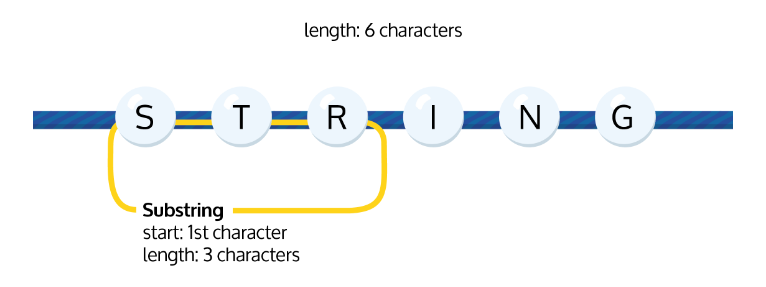

In [15]:
%%sql
SELECT SUBSTRING('LearnSQL.com', 9);

*  duckdb://
Done.


[('.com',)]

In [4]:
%%sql
SELECT SUBSTRING('LearnSQL.com', 1, 6); 

*  duckdb://
Done.


[('LearnS',)]

In [5]:
%%sql
SELECT REPLACE('LearnSQL.com', 'SQL', 'Python');

*  duckdb://
Done.


[('LearnPython.com',)]

# 11. NUMERIC FUNCTIONS

In [6]:
%%sql
SELECT 60 * 60 * 24 * 7;

*  duckdb://
Done.


[(604800,)]

In [7]:
%%sql
SELECT CAST(1234.567 AS integer);

*  duckdb://
Done.


[(1235,)]

In [8]:
%%sql
SELECT SQRT(9);

*  duckdb://
Done.


[(3.0,)]

In [9]:
%%sql
SELECT ABS(-12);

*  duckdb://
Done.


[(12,)]

In [10]:
%%sql
SELECT ROUND(1234.56789, 3);

*  duckdb://
Done.


[(Decimal('1234.568'),)]

In [11]:
%%sql
SELECT MOD(13, 2);

*  duckdb://
Done.


[(1,)]

# 12. USEFUL FUNCTIONS

1. **COALESCE(x, y, ...)**
To replace NULL in a query with something meaningful:

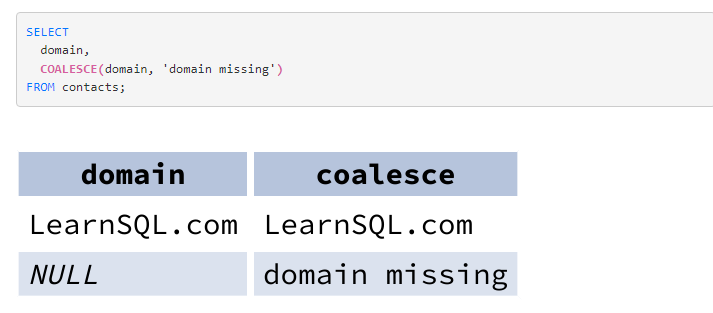

2. **NULLIF(x, y)**
To save yourself from division by 0 errors:

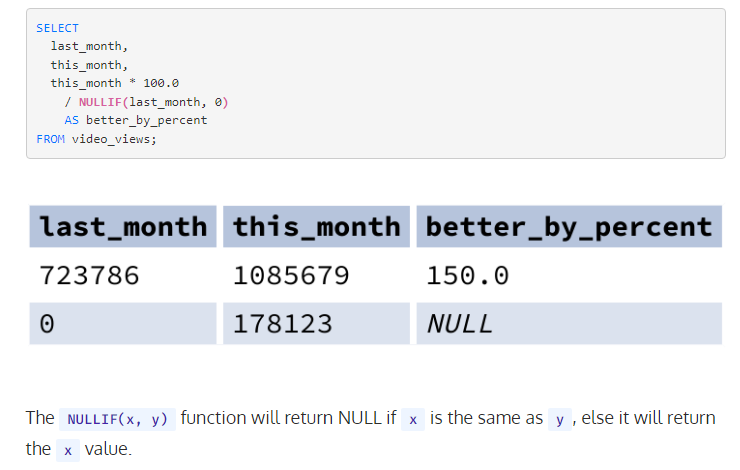

3. **CASE WHEN**: substituting one column with another

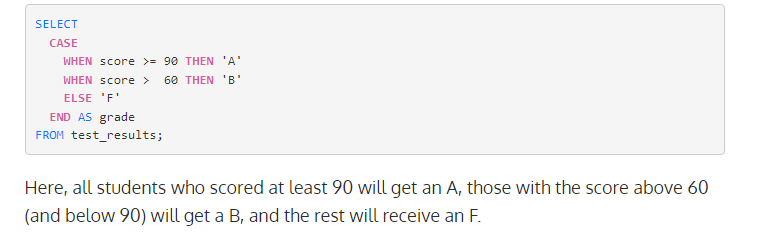

**Value Counts**

`SELECT
SUM(CASE
    WHEN col = 'M' THEN 1 ELSE 0 END),
SUM(CASE
    WHEN col = 'F' THEN 1 ELSE 0 END)
FROM table,`

# 13. DATE AND TIME

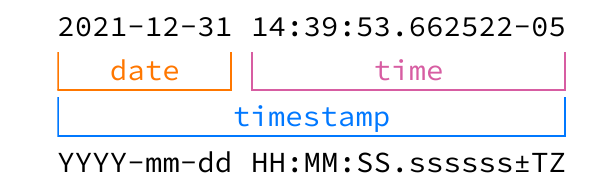

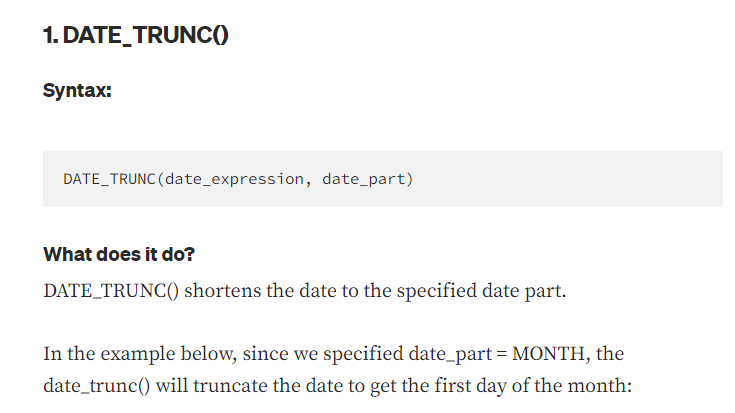

- When is it Useful?
  - DATE_TRUNC is extremely useful when you want to aggregate numbers on a periodic basis, such as a weekly, monthly, or yearly basis
  - DATE_TRUNC is necessary when conducting cohort analyses, where you typically group users by month
- Example(s)
  - Example 1: Suppose you wanted to get a weekly sum of sales from the table below:

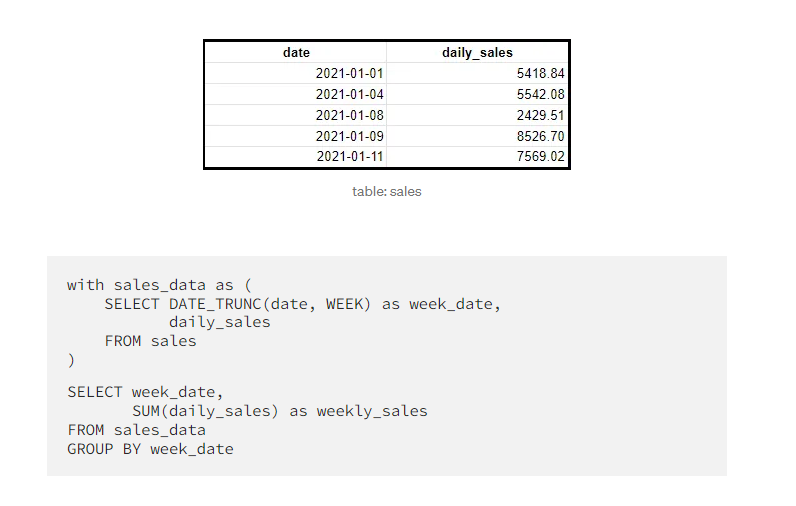

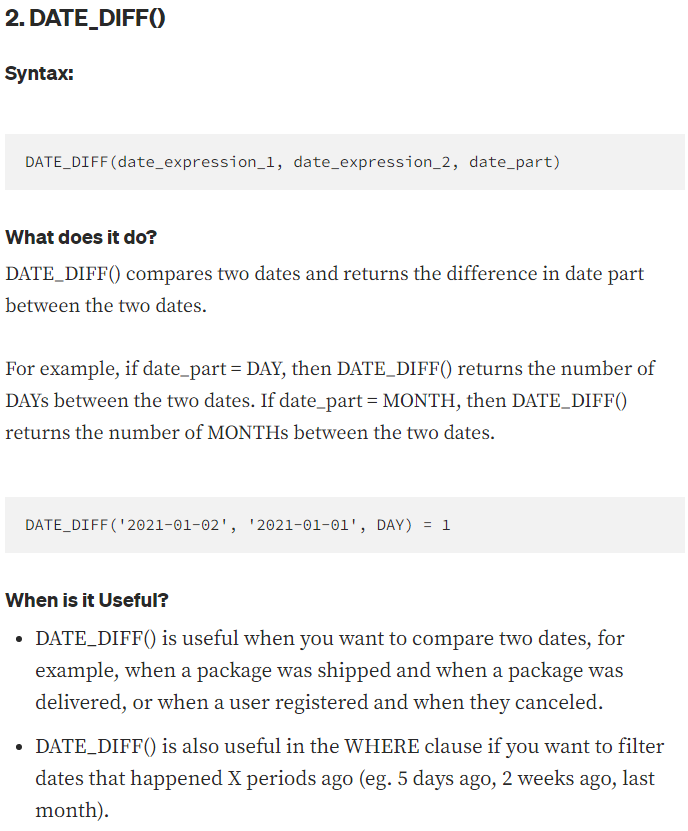
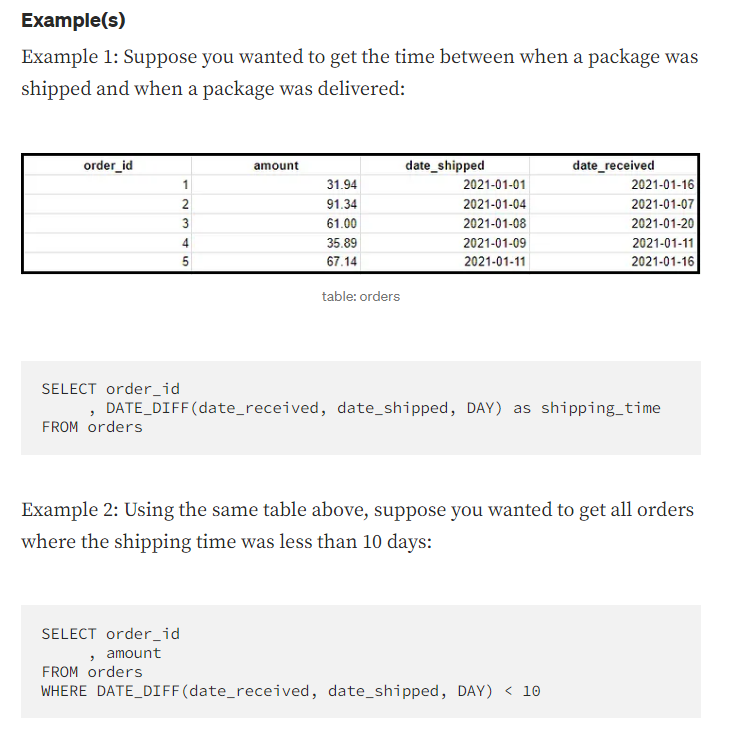

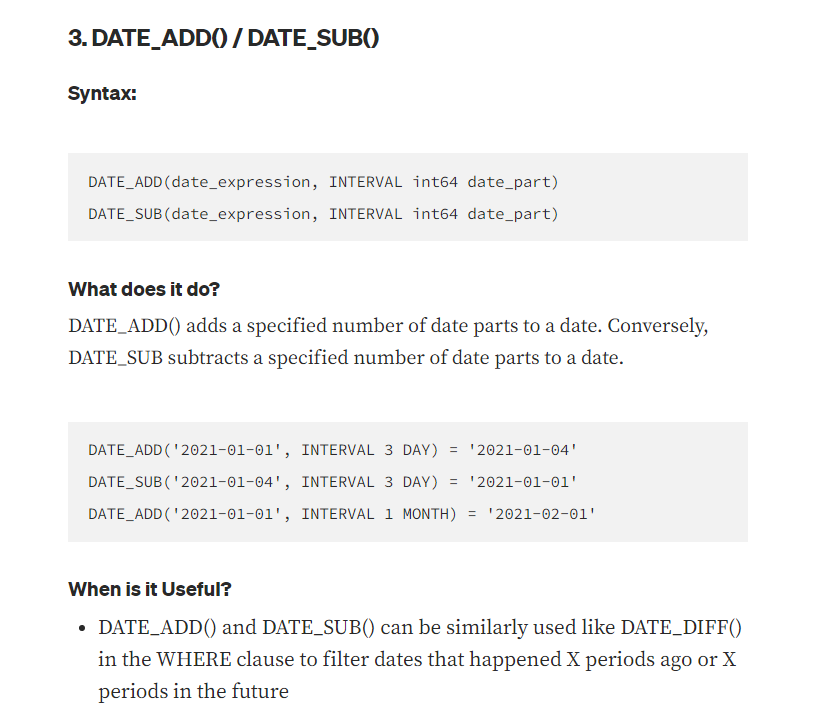

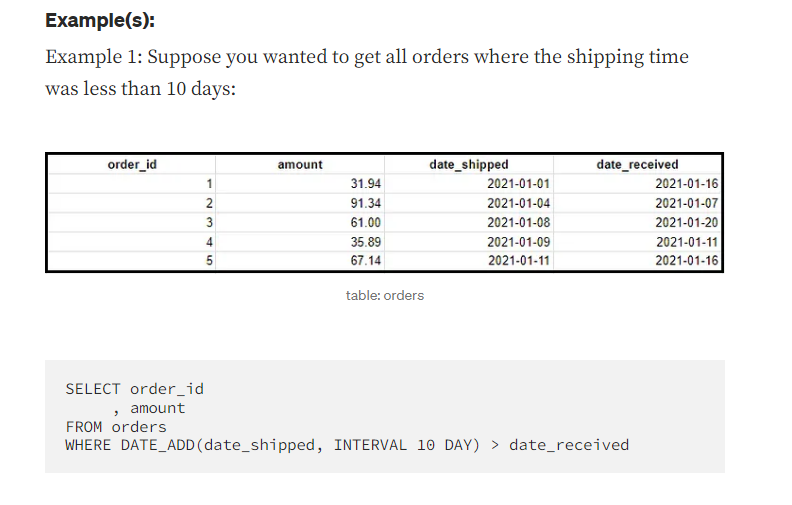

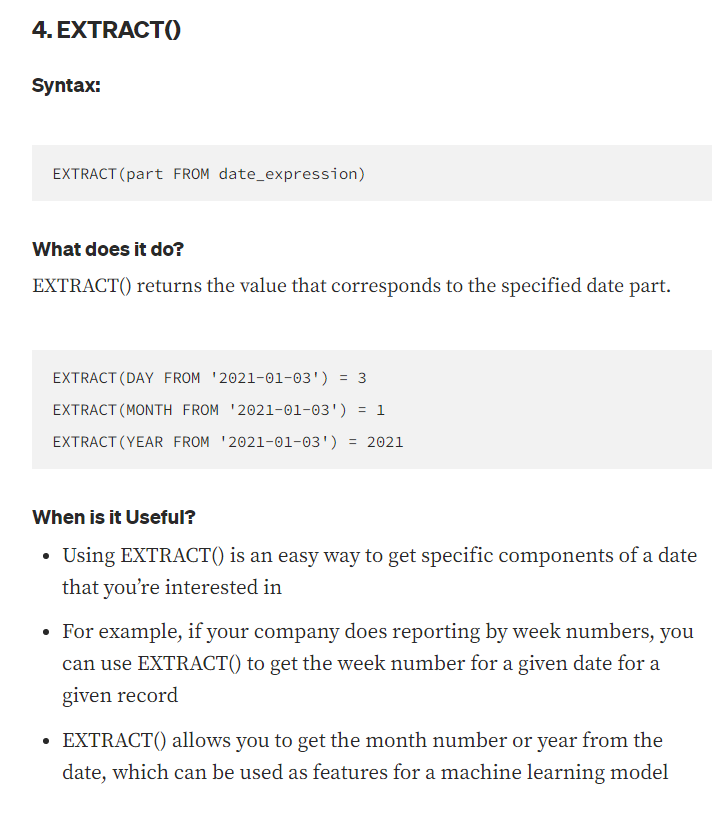

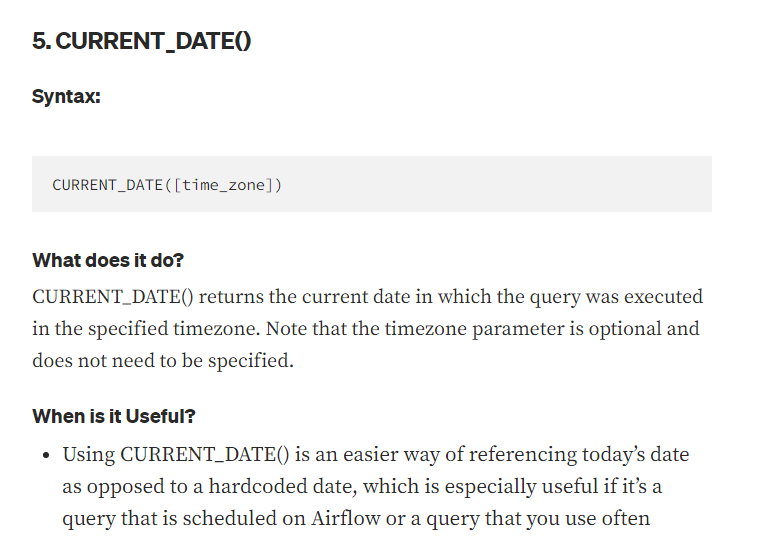

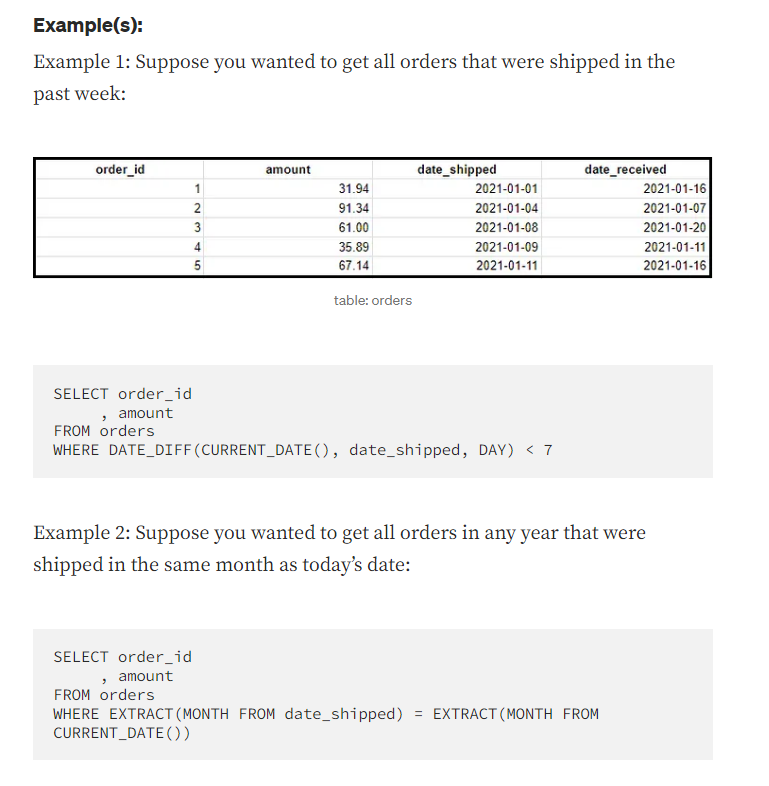

# 14. CTE (Common Table Expression)

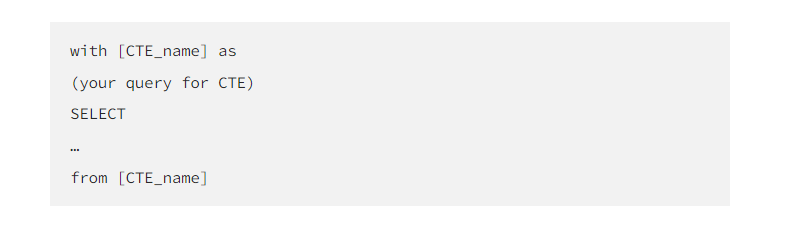

So, what are the advantages of using CTE rather than normal subquery in from clause?

- Better readability

- Reusability of the temporary tables

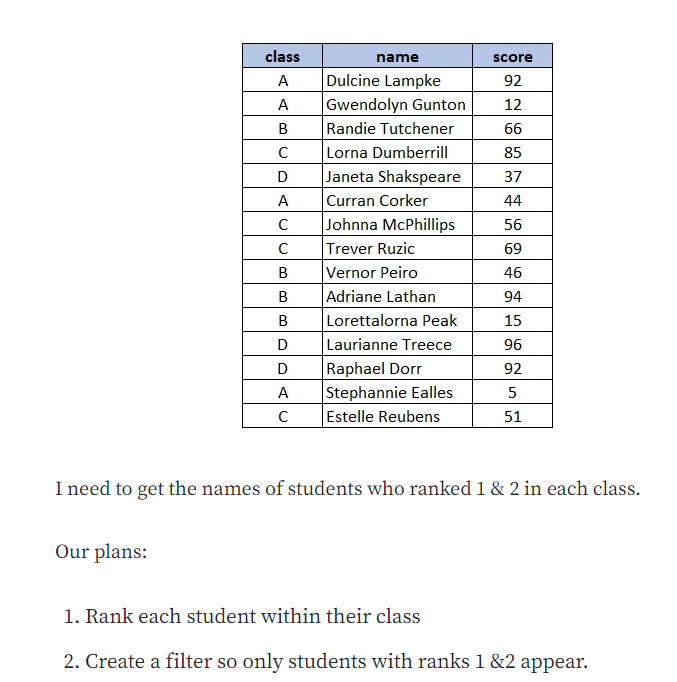

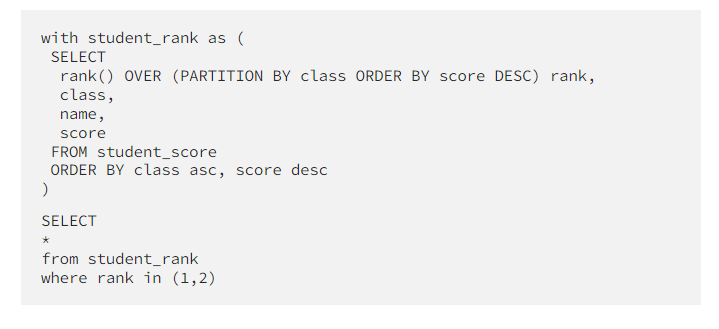

1. Plan 1: Within with statement, we created an imaginary table named student_rank to add rank field from student_score table that we had

2. Plan 2: Now that we had ranked all students within their class, all we need is to filter the table to get show only #1 and #2. To do this, we select fields from our preprocessed imaginary table student_rank and apply filter where rank in (1,2).

**This would be our results:**

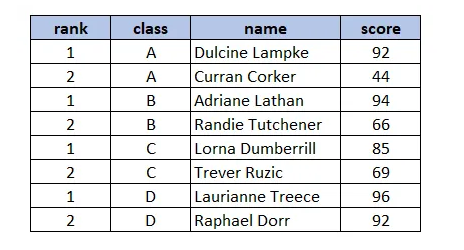

# Data Manipulation Language

**1. CREATE:
The CREATE statement is used to create a new database table, view, or other database objects. You should master using CREATE to create new tables, views, and other database objects.**

`CREATE TABLE table_name (
column_name TYPE column_constraint,
table_constraint table_constraint
)`

1. **NOT NULL** – the value of the column cannot be NULL.
2. **UNIQUE** – the value of the column must be unique across the whole table. However, the column can have many NULL values because PostgreSQL treats each NULL value to be unique. Notice that SQL standard only allows
one NULL value in the column that has the UNIQUE constraint.
3. **PRIMARY KEY** – this constraint is the combination of NOT NULL and UNIQUE constraints. You can define one column as PRIMARY KEY by using
column level constraint. In case the primary key contains multiple columns, you must use the tablelevel constraint.
4. **CHECK** – enables to check a condition when you insert or update data. For example, the values in the price column of the product table must be
positive values.
5. **REFERENCES** – constrains the value of the column that exists in a column
in another table. You use REFERENCES to define the foreign key constraint.
6. **FOREIGN KEY** – ensures values in a column or a group of columns from a table exists in a column or group of columns in another table. Unlike the primary key, a table can have many foreign keys.


`CREATE TABLE account(
user_id serial PRIMARY KEY,
username VARCHAR (50) UNIQUE NOT NULL,
password VARCHAR (50) NOT NULL,
email VARCHAR (355) UNIQUE NOT NULL,
created_on TIMESTAMP NOT NULL,
last_login TIMESTAMP,
col1 INTEGER references table_name(col_name) ON DELETE CASCADE,
col1 INTEGER references table_name(col_name) ON DELETE NULL,
CONSTRAINT xyz FOREIGN KEY (username) REFERENCES table_name(col_name) ON DELETE CASCADE);`

- ON DELETE CASCADE	When the referenced data gets deleted, the referencing rows of data will be automatically deleted as well.
- ON DELETE SET NULL	When the referenced data gets deleted, the referring column will have its value set to NULL. Since NULL is a special value, it won't break the foreign key constraint because it will be clear that the row of data is now referencing absolutely nothing.

`DROP TABLE IF EXISTS employees;
CREATE TABLE employees (
	id SERIAL PRIMARY KEY,
	first_name VARCHAR (50),
	last_name VARCHAR (50),
	birth_date DATE CHECK (birth_date > '1900-01-01'),
	joined_date DATE CHECK (joined_date > birth_date),
	salary numeric CHECK(salary > 0)
);`

The  employees table has three CHECK constraints:

- First, the birth date ( birth_date) of the employee must be greater than 01/01/1900. If you try to insert a birth date before 01/01/1900, you will receive an error message.
- Second, the joined date ( joined_date) must be greater than the birth date ( birth_date). This check will prevent from updating invalid dates in terms of their semantic meanings.
- Third, the salary must be greater than zero, which is obvious.

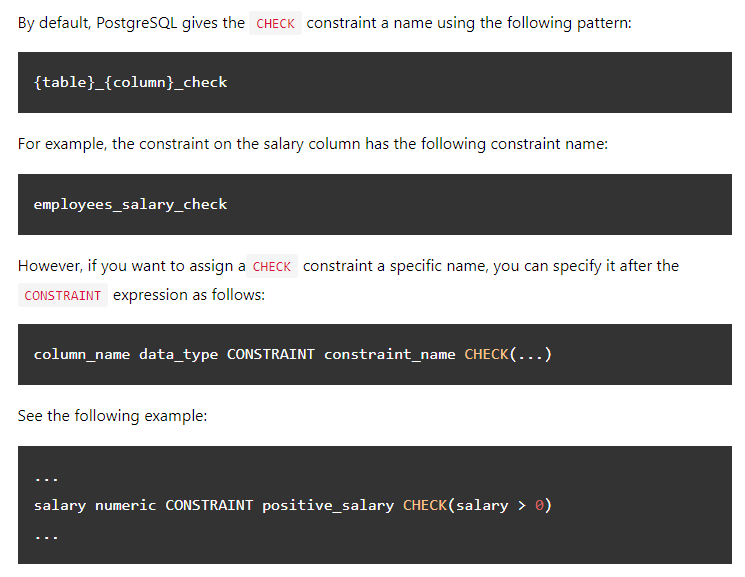

**2. INSERT:The INSERT statement allows you to insert one or more rows into a table.**
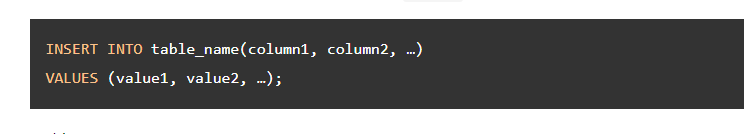

In [47]:
%%sql

DROP TABLE IF EXISTS courses;

CREATE TABLE courses(
  course_id serial primary key,
  course_name VARCHAR(255) NOT NULL,
  description VARCHAR(500),
  published_date date
);

   duckdb://
*  sqlite://
Done.
Done.


[]

`INSERT INTO 
	courses(course_name, description, published_date)
VALUES
	('PostgreSQL for Developers','A complete PostgreSQL for Developers','2020-07-13'),
	('PostgreSQL Admininstration','A PostgreSQL Guide for DBA',NULL),
	('PostgreSQL High Performance',NULL,NULL),
	('PostgreSQL Bootcamp','Learn PostgreSQL via Bootcamp','2013-07-11'),
	('Mastering PostgreSQL','Mastering PostgreSQL in 21 Days','2012-06-30');`

`SELECT * FROM courses;`
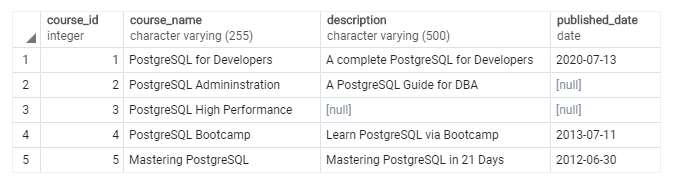

**2. UPDATE:The PostgreSQL UPDATE statement allows you to modify data in a table.**
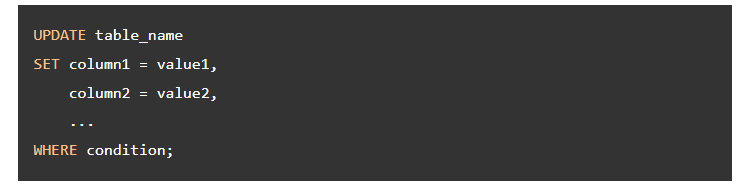

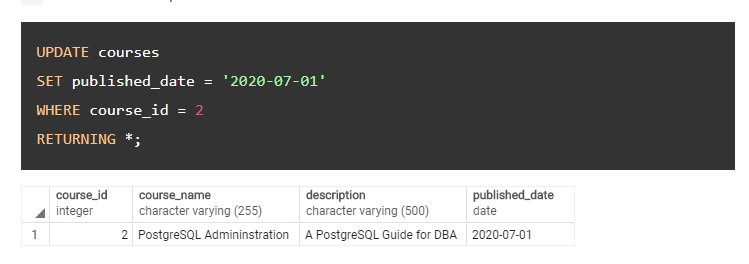

**3. ALTER: To change the structure of an existing table, you use PostgreSQL ALTER TABLE statement.**

`ALTER TABLE table_name action;`

1. `ALTER TABLE table_name ALTER COLUMN column_name SET DEFAULT expression`
2. `ALTER TABLE table_name ALTER COLUMN column_name  DROP DEFAULT`
3. `ALTER TABLE table_name ALTER COLUMN column_name { SET | DROP } NOT NULL`
4. `ALTER TABLE table_name ALTER COLUMN column_name DROP EXPRESSION [ IF EXISTS ]`


5. `ALTER INDEX index_name
ADD column_name,
DROP column_name;`

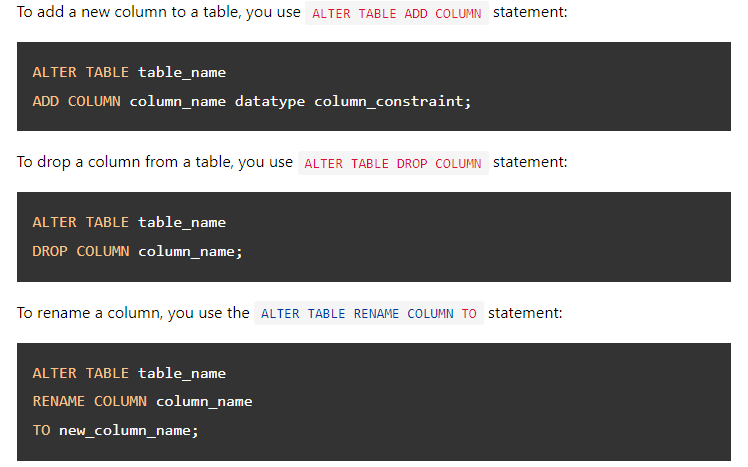

**4. DELETE: The PostgreSQL DELETE statement allows you to delete one or more rows from a table.**

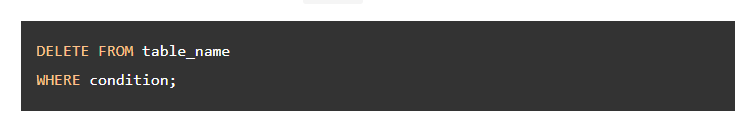

`DELETE FROM links
WHERE id = 7
RETURNING *;`

# CREATE INDEX

- Similar to a phonebook, the data stored in the table should be organized in a particular order to speed up various searches. This is why indexes come into play.

- By definition, an index is a separated data structure that speeds up the data retrieval on a table at the cost of additional writes and storage to maintain the index.

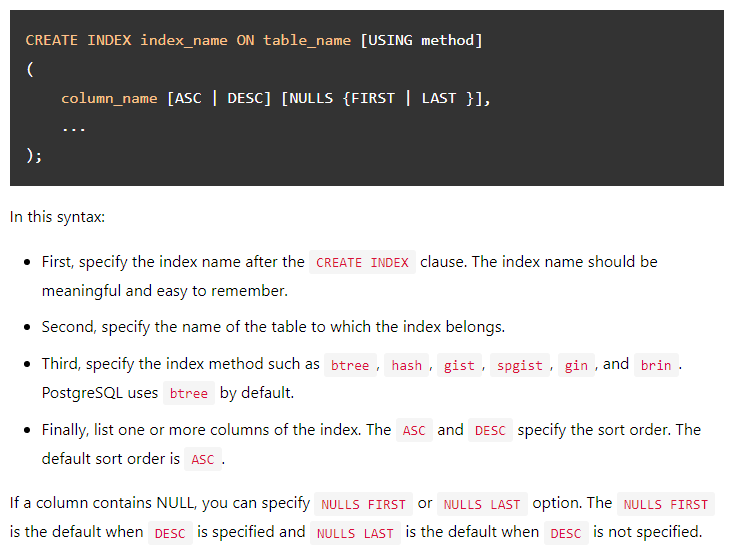

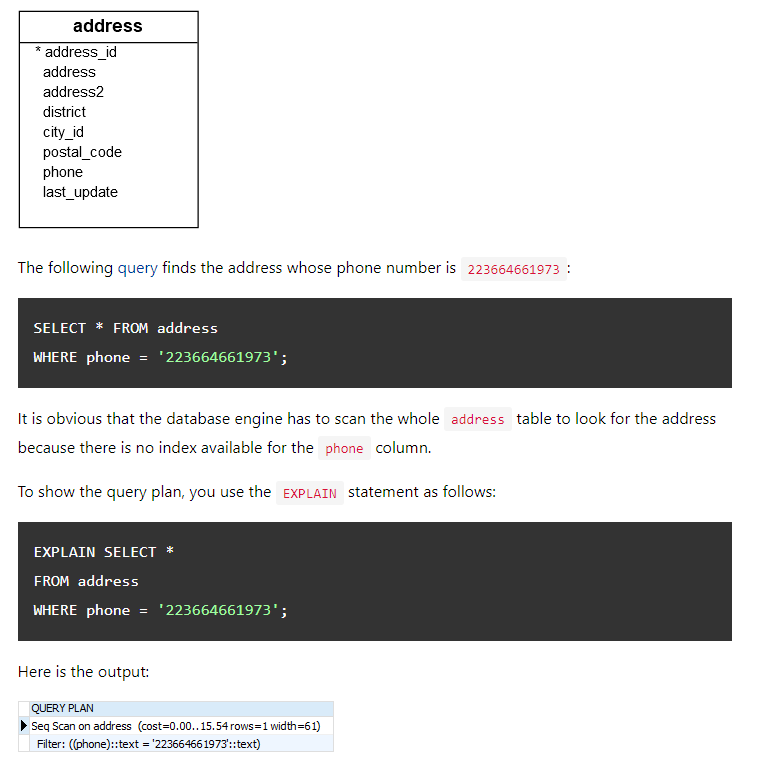

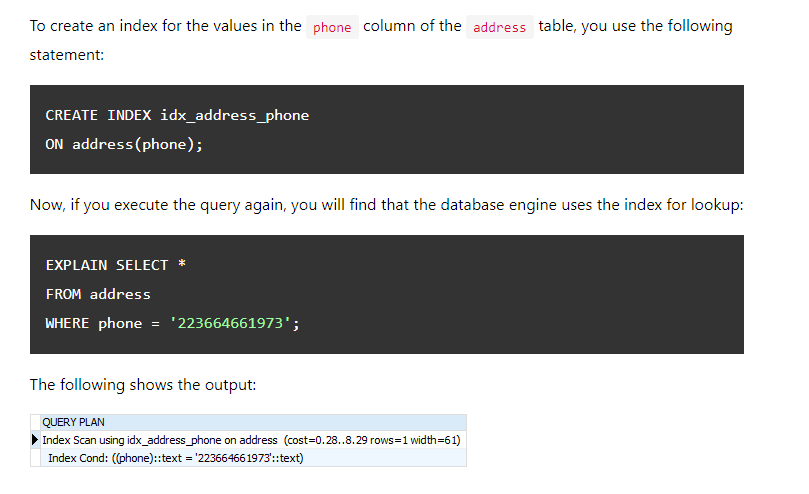

# UNIQUE index

- The PostgreSQL UNIQUE index enforces the uniqueness of values in one or multiple columns.
- Note that only B-tree indexes can be declared as unique indexes.
- When you define an UNIQUE index for a column, the column cannot store multiple rows with the same values.
- If you define a UNIQUE index for two or more columns, the combined values in these columns cannot be duplicated in multiple rows.
- PostgreSQL treats NULLs as distinct values, therefore, you can have multiple NULL values in a column with a UNIQUE index.
- When you define a primary key or a unique constraint for a table, PostgreSQL automatically creates a corresponding UNIQUE index.

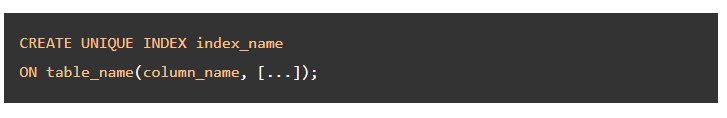

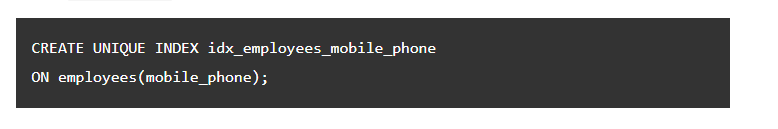

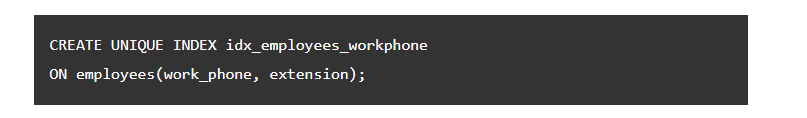

# Clustered index

- Clustered index is the type of indexing that establishes a physical sorting order of rows.
- Note that defining a column as a primary key makes that column the Clustered Index of that table.
- We can create only one clustered index in a table.
- To make any other column, the clustered index, first we have to remove the previous one as follows below. 

`//Drop index
drop index table_name.index_name
//Create Clustered index index
create Clustered index IX_table_name_column_name 
             on table_name (column_name ASC)  `

# Non-clustered Index

- Non-Clustered index is an index structure separate from the data stored in a table that reorders one or more selected columns. The non-clustered index is created to improve the performance of frequently used queries not covered by a clustered index. It’s like a textbook; the index page is created separately at the beginning of that book.
- We can create one or more Non_Clustered index in a table. 
- Syntax:

`//Create Non-Clustered index
create NonClustered index IX_table_name_column_name 
on table_name (column_name ASC) `

# EXPLAIN statement

- The EXPLAIN statement returns the execution plan which PostgreSQL planner generates for a given statement.
- The EXPLAIN shows how tables involved in a statement will be scanned by index scan or sequential scan, etc., and if multiple tables are used, what kind of join algorithm will be used.
- The most important and useful information that the EXPLAIN statement returns are start-cost before the first row can be returned and the total cost to return the complete result set.

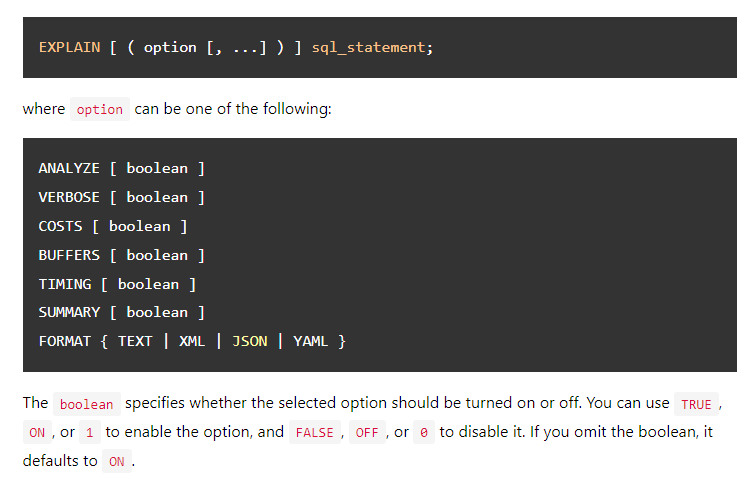

- ANALYZE
  - The ANALYZE option causes the sql_statement to be executed first and then actual run-time statistics in the returned information including total elapsed time expended within each plan node and the number of rows it actually returned.
  - The ANALYZE statement actually executes the SQL statement and discards the output information, therefore, if you want to analyze any statement such as INSERT, UPDATE, or DELETE without affecting the data, you should wrap the EXPLAIN ANALYZE in a transaction, as follows:

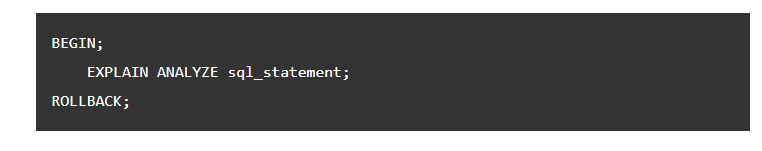

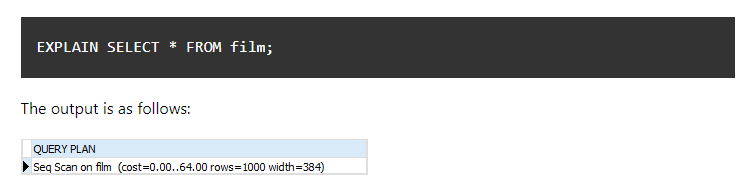

VERBOSE
The VERBOSE parameter allows you to show additional information regarding the plan. This parameter sets to FALSE by default.

COSTS
The COSTS option includes the estimated startup and total costs of each plan node, as well as the estimated number of rows and the estimated width of each row in the query plan. The COSTS defaults to TRUE.

BUFFERS
This parameter adds information to the buffer usage. BUFFERS only can be used when ANALYZE is enabled. By default, the BUFFERS parameter set to FALSE.

TIMING
This parameter includes the actual startup time and time spent in each node in the output. The TIMING defaults to TRUE and it may only be used when ANALYZE is enabled.

SUMMARY
The SUMMARY parameter adds summary information such as total timing after the query plan. Note that when ANALYZE option is used, the summary information is included by default.

FORMAT
Specify the output format of the query plan such as TEXT, XML, JSON, and YAML. This parameter is set to TEXT by default.

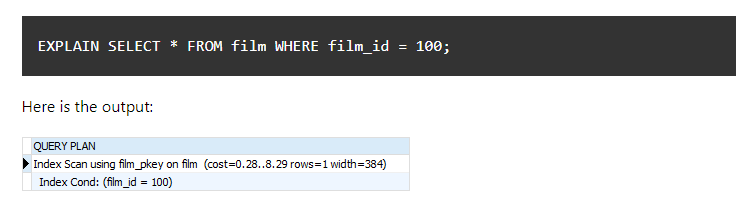

- `Seq Scan on phonebook_1000000  (cost=0.00..18284.00 rows=1000000 width=34)`
- `Seq Scan on phonebook_1000000  (cost=0.00..20784.00 rows=324 width=34) 
 (actual time=0.169..112.646 rows=343 loops=1)
   Filter: ((first_name)::text = 'John'::text)
   Rows Removed by Filter: 999657
 Planning time: 0.213 ms
 Execution time: 117.582 ms`
- `Bitmap Heap Scan on phonebook  (cost=44.64..4863.00 rows=2092 width=34)
   Recheck Cond: ((last_name)::text = 'Smith'::text)
   ->  Bitmap Index Scan on phonebook_last_name_idx  
   (cost=0.00..44.11 rows=2092 width=0)
     Index Cond: ((last_name)::text = 'Smith'::text)`
- `Bitmap Heap Scan on phonebook  (cost=44.12..4867.70 rows=1 width=34)
   Recheck Cond: ((last_name)::text = 'Smith'::text)
   Filter: ((first_name)::text = 'John'::text)
   ->  Bitmap Index Scan on phonebook_last_name_idx  
   (cost=0.00..44.11 rows=2092 width=0)
     Index Cond: ((last_name)::text = 'Smith'::text)`

- This output doesn't show any filter / condition. That was probably the result of a SELECT ... FROM without a filter, and the fastest way to do this is to simply scan the whole table and return every row.
- This output shows actual values in addition to estimates: it was created using EXPLAIN ANALYZE. We can see that there's a huge mismatch between the number of rows eliminated and the number of total rows. This tells us that Postgres has had to look at a huge number of rows only to return a few. Although we can't tell with 100% certainty, there's a good chance that the first_name column of this table isn't indexed.
- The tree structure tells us that this query plan contains two nodes that will happen sequentially. The fact that we see a bitmap index scan instead of a regular index scan can hint that this query is going to return more than "just a few rows" when compared to the total number of rows in that table. Otherwise, we might have expected Postgres to use an index scan. 
- This output is similar to the previous one, but with an additional filter. One additional conclusion that we can draw is that the index that is being used is only on last_name, or at least that it's not on (last_name, first_name): if it was, then the bitmap index scan would have eliminated more rows, and we wouldn't have required filtering on first_name during the bitmap heap scan.

- Composite Index	An index that targets multiple columns. The order in which the columns are specified matters.
- Sequential Scan	A database operation where every row of a table is visited in order to fulfill a particular query.
- Query Planner	The part of Postgres that looks at a query to be executed, table statistics, and available resources to decide on a Query Plan.
- Query Plan	The ordered series of steps that Postgres will follow in order to fulfill a query.
- Query Plan Cost	A unitless measure of how much effort and resources will be required in order to fulfill a query. Only comparable to itself for a given query after making some changes to data and/or indexes.
- Query Plan Node	A unit of work in a query plan, i.e. one of the steps required to fulfill a query.

# Introduction to Data Normalization

1. A **denormalized table** is, succinctly put, a "free-for-all". The only thing consistent about it is that it fits into rows and columns. Some examples of things that can make data denormalized are:
- Inconsistent data types
- Repeating columns
- Repeating values
- Denormalized data exhibits many issues:
  - Inconsistent data types across a given column, making it difficult to manage and reason about
  - Repeated columns, which disable us from scaling the number of items of related data
  - Repeated values in a column, which make querying on those values more challenging
  - The inability to uniquely identify rows of data to target them for manipulation
  - Irrelevant dependencies, which cause repetitions and anomalies

2. **First Normal Form**
- Make all values in a column consistently of the same data type
  - To keep the same data type in a given column of a table, go through all the existing rows of data, and make sure they're all consistent: either all numbers, or all text, dates, etc.
- Make sure each cell contains only a single value
   - If multiple values in a cell are disjoint, e.g. a name and a code, split them into two columns—one for the name and one for the code
   - If multiple values in a cell are the same type, e.g. a list of phone numbers, create multiple rows for that single row and put one of the values in each new row
- Make sure there are no repeating columns for the same data (e.g. category 1, 2, 3…)
- Enable the rows of data to be uniquely identified through a column or combination of columns
  - Candidate key: a set of one or more columns that can uniquely identify a row in a table
    - It is a minimal super key.
    - It is a super key with no repeated data is called a candidate key.
    - The minimal set of attributes that can uniquely identify a record.
    - It must contain unique values.
    - It can contain NULL values.
    - Every table must have at least a single candidate key.
    - A table can have multiple candidate keys but only one primary key (the primary key cannot have a NULL value, so the candidate key with a NULL value can’t be the primary key).
    - The value of the Candidate Key is unique and may be null for a tuple.
    - There can be more than one candidate key in a relationship. 
  - Primary key: the key we choose from the candidate keys to uniquely represent a row in a table.
    - It is a unique key.
    - It can identify only one tuple (a record) at a time.
    - It has no duplicate values, it has unique values.
    - It cannot be NULL.
    - Primary keys are not necessarily to be a single column; more than one column can also be a primary key for a table.
  - Alternate Key: The candidate key other than the primary key is called an alternate key.
    - All the keys which are not primary keys are called alternate keys.
    - It is a secondary key.
    - It contains two or more fields to identify two or more records.
    - These values are repeated.

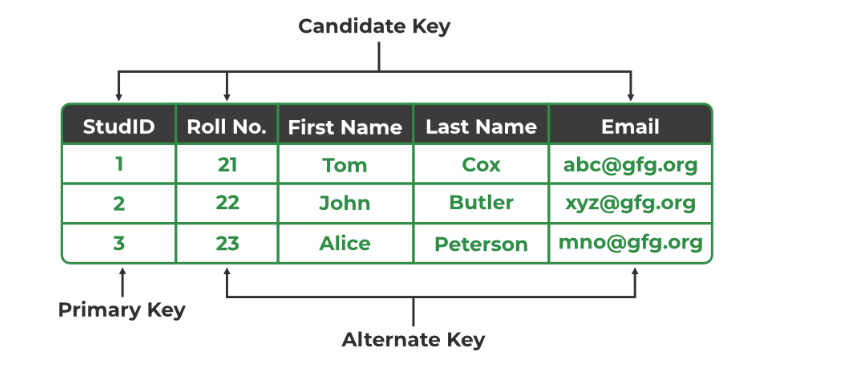

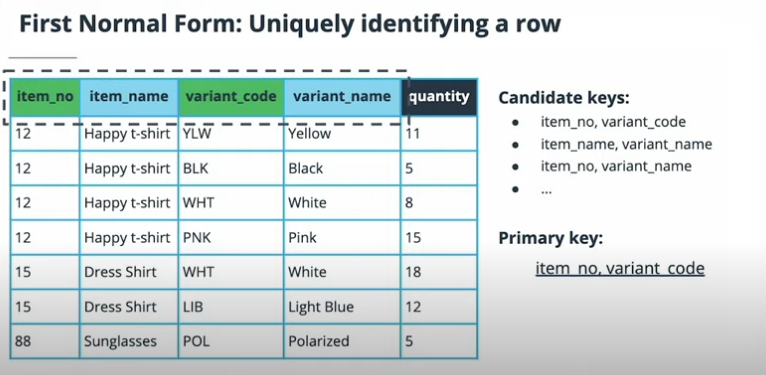

3. **Second Normal Form**
- Bring table to First Normal Form
- Remove all partial dependencies:Partial dependency: a column that isn't part of the primary key, and that depends only on part of the primary key. For example, if the primary key (PK) is (student_no, course_id), then a column called student_name would be a partial dependency on the PK because it only depends on the student_no.



4. **Third Normal Form**
- Bring the table to Second Normal Form
- Eliminate transitive dependencies: Transitive dependency: when a column that isn't part of the primary key depends on the primary key, but through another non-key column. For example, a table of movie reviews would have a surrogate id column as its PK, and a movie_id column to refer to the movie which is being reviewed. If the table also contains a movie_name column, then that movie_name is transitively dependent on the PK, because it depends on it through movie_id.
  - To eliminate transitive dependencies, we'll use a strategy similar to that of eliminating partial dependencies: remove the concerned columns, and, if a table linking those columns to the one they depend on doesn't exist, create it. Keeping with the movie reviews example above, this would mean creating a table for movies, with an id and a movie_name, and only keeping the movie_id column in the reviews table.

5. Postgres and other relational databases provide transactional guarantees that can be remembered under the acronym ACID. They are:

- Atomicity: The database guarantees that a transaction will either register all the commands in a transaction, or none of them.
- Consistency: The database guarantees that a successful transaction will leave the data in a consistent state, one that obeys all the rules that you've setup. We've seen simple rules like limiting the number of characters in a VARCHAR column, and we'll see many more in the next lesson
- Isolation: The database guarantees that concurrent transactions don't "see each other" until they are committed. Committing a transaction is a command that tells the database to execute all the commands we passed to it since we started that transaction.
- Durability: The database guarantees that once it accepts a transaction and returns a success, the changes introduced by the transaction will be permanently stored on disk, even if the database crashes right after the success response.

- When interacting with Postgres through its command line, a feature called AUTOCOMMIT is automatically enabled. This feature makes it so that every command you run is wrapped in a transaction. It's possible to turn off this feature by executing \set AUTOCOMMIT off from the psql command line.

- In the case where AUTOCOMMIT is off, or in the case where the database is being interacted with through application code, starting a transaction is achieved using the START TRANSACTION or BEGIN commands, which are equivalent. Any commands executed after this will be run in isolation from any other transactions. If the application — or the psql program — crashes at any point, all the commands will be discarded. We can also manually discard all the commands executed after starting a transaction by running ROLLBACK. In order to make the changes permanent, one has to execute the command COMMIT or END, which are equivalent.

- We can observe the isolation property of transactions by running two psql sessions and issuing commands with AUTOCOMMIT set to off. Doing so, we'll see that the commands executed in one session don't affect the data seen in the other session until we run COMMIT.

- We can observe the consistency property of transactions by starting one manually in psql, and provoking an error after executing a successful DML query. If trying to commit the semi-failed transaction, Postgres will reply with ROLLBACK: it will refuse to execute the whole transaction because an error happened at some point during it, thereby preserving the consistency of our data.

- Composite Key: Sometimes, a table might not have a single column/attribute that uniquely identifies all the records of a table. To uniquely identify rows of a table, a combination of two or more columns/attributes can be used.  It still can give duplicate values in rare cases. So, we need to find the optimal set of attributes that can uniquely identify rows in a table.
  - It acts as a primary key if there is no primary key in a table
  - Two or more attributes are used together to make a composite key.
  - Different combinations of attributes may give different accuracy in terms of identifying the rows uniquely.

- 3. Super Key: The set of attributes that can uniquely identify a tuple is known as Super Key. For Example, STUD_NO, (STUD_NO, STUD_NAME), etc. A super key is a group of single or multiple keys that identifies rows in a table. It supports NULL values. 
   - Adding zero or more attributes to the candidate key generates the super key.
   - A candidate key is a super key but vice versa is not true.
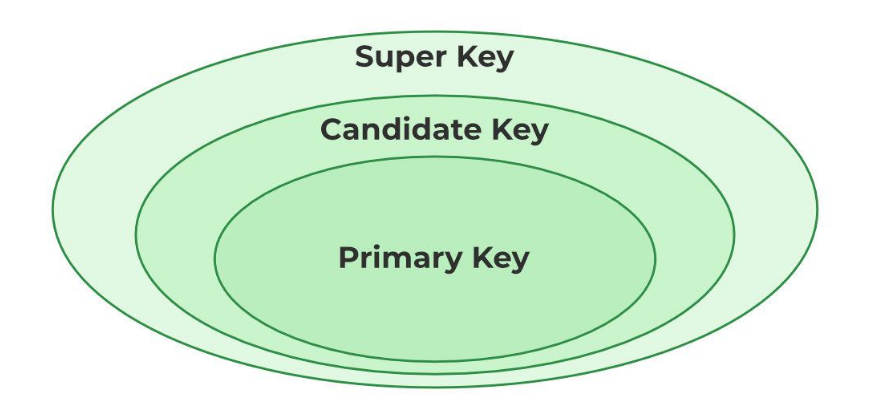

# Exercise Instructions
In this exercise, you'll get to review many of the new skills you've developed with relational databases! You're being tasked with creating a database of movies with the following specification:

- A movie has a title and a description, and zero or more categories associated to it.
- A category is just a name, but that name has to be unique
- Users can register to the system to rate movies:
  - A user's username has to be unique in a case-insensitive way. For instance, if a user registers with the username "Bob", then nobody can register with "bob" nor "BOB"
  - A user can only rate a movie once, and the rating is an integer between 0 and 100, inclusive
  - In addition to rating movies, users can also "like" categories.
- The following queries need to execute quickly and efficiently. The database will contain ~6 million movies:
  - Finding a movie by partially searching its name
  - Finding a user by their username
  - For a given user, find all the categories they like and movies they rated
  - For a given movie, find all the users who rated it
  - For a given category, find all the users who like it

`CREATE TABLE "movies" (
  "id" SERIAL PRIMARY KEY,
  "title" VARCHAR(500), --  Night of the Day of the Dawn of the Son of the Bride of the Return of the Revenge of the Terror of the Attack of the Evil, Mutant, Hellbound, Flesh-Eating Subhumanoid Zombified Living Dead, Part 3
  "description" TEXT
);`


`CREATE TABLE "categories" (
  "id" SERIAL PRIMARY KEY,
  "name" VARCHAR(50) UNIQUE
);`

`CREATE TABLE "movie_categories" (
  "movie_id" INTEGER REFERENCES "movies",
  "category_id" INTEGER REFERENCES "categories",
  PRIMARY KEY ("movie_id", "category_id")
);`

`CREATE TABLE "users" (
  "id" SERIAL PRIMARY KEY,
  "username" VARCHAR(100),
);
CREATE UNIQUE INDEX ON "users" (LOWER("username"));`

`CREATE TABLE "user_movie_ratings" (
  "user_id" INTEGER REFERENCES "users",
  "movie_id" INTEGER REFERENCES "movies",
  "rating" SMALLINT CHECK ("rating" BETWEEN 0 AND 100),
  PRIMARY KEY ("user_id", "movie_id")
);
CREATE INDEX ON "user_movie_ratings" ("movie_id");`

`CREATE TABLE "user_category_likes" (
  "user_id" INTEGER REFERENCES "users",
  "category_id" INTEGER REFERENCES "categories",
  PRIMARY KEY ("user_id", "category_id")
);
CREATE INDEX ON "user_category_likes" ("category_id");`

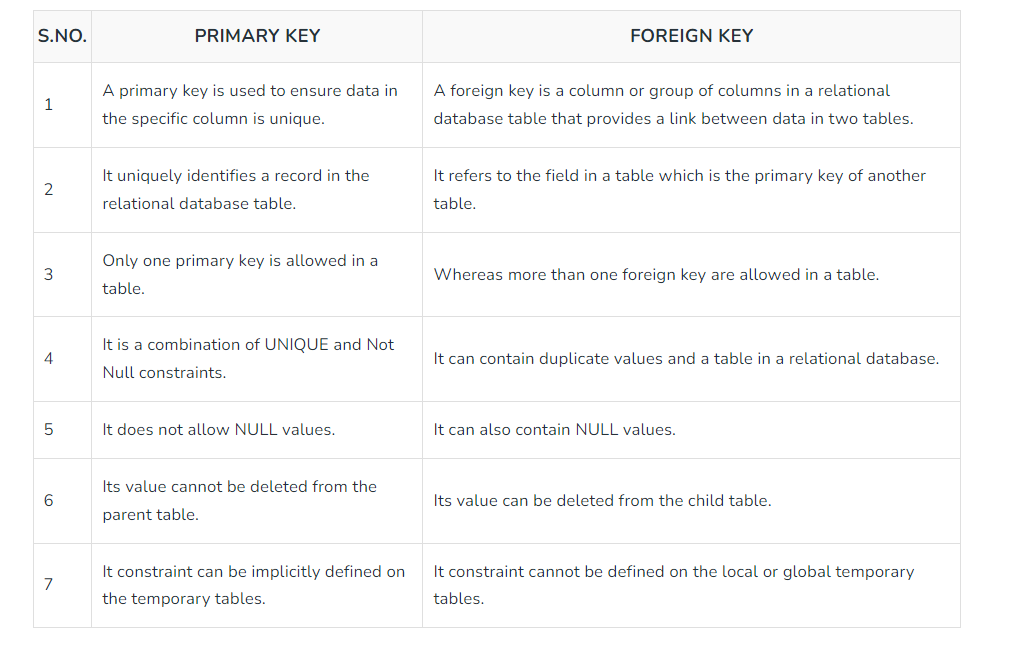

# VIEWS

- A view is nothing more than a SQL statement that is stored in the database with an associated name. A view is actually a composition of a table in the form of a predefined SQL query.
- A view can contain all rows of a table or select rows from a table. A view can be created from one or many tables which depends on the written SQL query to create a view.
- Views, which are a type of virtual tables allow users to do the following :
    - Structure data in a way that users or classes of users find natural or intuitive.
    - Restrict access to the data in such a way that a user can see and (sometimes) modify exactly what they need and no more.
    - Summarize data from various tables which can be used to generate reports.

- `CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];`
- `UPDATE view_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];`

- `DROP VIEW view_name;`
- `ALTER VIEW view_name
AS select_statement;`

# TRIGGERS

- A trigger is a piece of code executed automatically in response to a specific event occurred on a table in the database.
- A trigger is always associated with a particular table. If the table is deleted, all the associated triggers are also deleted automatically.
- A trigger is invoked either before or after the following event:
   - INSERT – when a new row is inserted
   - UPDATE – when an existing row is updated
   - DELETE – when a row is deleted.

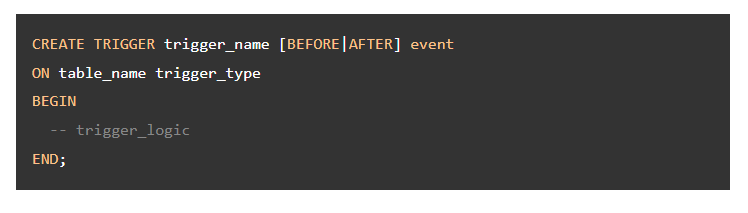

- First, specify the name of the trigger after the CREATE TRIGGER clause.
- Next, use either BEFORE or AFTER keyword to determine when to the trigger should occur in response to a specific event e.g., INSERT, UPDATE, or DELETE.
- Then, specify the name of the table to which the trigger binds.
- After, specify the type of trigger using either FOR EACH ROW or FOR EACH STATEMENT. We will discuss more on this in the next section.
  - A row level trigger executes each time a row is affected by an UPDATE statement. If the UPDATE statement affects 10 rows, the row level trigger would execute 10 times, each time per row. If the UPDATE statement does not affect any row, the row level trigger is not executed at all.
  - Different from the row level trigger, a statement level trigger is called once regardless of how many rows affect by the UPDATE statement. Note that if the UPDATE statement did not affect any rows, the trigger will still be executed.
- Finally, put the logic of the trigger in the BEGIN ... END block.

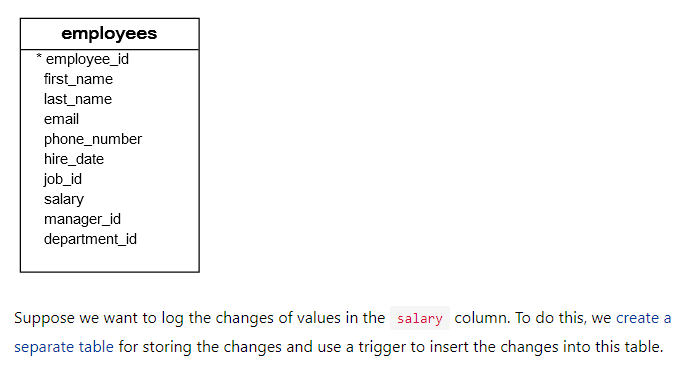

`CREATE TABLE salary_changes (
    employee_id INT,
    changed_at DATETIME DEFAULT CURRENT_TIMESTAMP,
    old_salary DECIMAL(8 , 2 ),
    new_salary DECIMAL(8 , 2 ),
    PRIMARY KEY (employee_id , changed_at)
);`

`CREATE TRIGGER before_update_salary
BEFORE UPDATE ON employees
FOR EACH ROW
BEGIN
   IF NEW.salary <> OLD.salary THEN
	INSERT INTO salary_changes(employee_id,old_salary,new_salary)
        VALUES(NEW.employee_id,OLD.salary,NEW.salary);
    END IF;
END;`
- In the body of the trigger, we insert the changes if the new salary is different from the old one.
- Note that within the trigger body, we use the OLD and NEW keywords to access columns in the rows affected by a trigger.